# **E-commerce Customer Churn Prediction**
**By : Fani Indriyaningsih**



# Business Problem Understanding

## Context

Sebuah perusahaan ritel online (E-commerce) berusaha untuk mengidentifikasi pelanggan yang kemungkinan besar akan berhenti menggunakan layanan mereka, atau yang dikenal dengan istilah "churn." Dengan memprediksi pelanggan yang berpotensi beralih ini, perusahaan dapat mengambil langkah proaktif untuk mempertahankan mereka, seperti menawarkan promosi khusus, diskon, atau insentif lainnya. Tujuan utamanya adalah untuk meningkatkan loyalitas pelanggan dan mengurangi tingkat churn, yang pada akhirnya akan mendukung operational cost dalam meminimalisir cost promosi.

Target :<br>
0 = No Churn<br>
1 = Churn


## Problem Statement

Dalam domain e-commerce, mendapatkan pelanggan baru umumnya lebih mahal daripada mempertahankan pelanggan yang sudah ada. Pelanggan biasanya pergi jika mereka tidak mendapatkan insentif yang baik. Oleh karena itu, perusahaan ingin meminimalisir biaya promosi dengan mengetahui pelanggan churn.

## Goals

Perusahaan mampu memprediksi e-commerce customer yang akan churn

## Analytic Approach

Membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi pelanggan yang terindikasi akan churn atau no churn pada e-commerce tersebut.

<!-- ![Confusion Matrix](CM.jpg) -->
<img src="confusion_matrix.jpg" alt="Python Logo" width="550" height="350">


Focus :
- FP
  <br>Dampak : Provit perusahaan kecil karna predict No churn , Actual Churn
- FN
  <br>Dampak : Biaya promosi besar yang telah dikeluarkan karna predict churn, Actual No Churn

----
Matrix Evaluation menggunakan F1 - Score

# Import Libaries

In [99]:
# Library

import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno # missing no matrix
from scipy import stats
import plotly.express as px # check imbalance
from sklearn.model_selection import learning_curve
import shap # feature importance
from sklearn.model_selection import train_test_split # feature importance
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix

# Cleaning
from sklearn.impute import KNNImputer # missing values

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Benchmarking Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline


# Data Understanding

**Features**

| No. | Attribute | Description |
| --- | --- | --- |
|1.|Tenure|Masa customer berlangganan pada e-commerce|
|2.|WarehouseToHome|Jarak antara gudang dengan rumah customer|
|3.|NumberOfDeviceRegistered|Jumlah perangkat yang didaftarkan pada satu akun customer tertentu|
|4.|PreferedOrderCat|Kategori yang dipesan dalam satu bulan terakhir|
|5.|SatisfactionScore|Nilai kepuasan pelanggan terhadap layanan|
|6.|MaritalStatus|Status pernikahan customer|
|7.|NumberOfAddress|Jumlah alamat yang ditambahkan customer pada ecommerce|
|8.|Complaint|Keluhan yang diajukan dalam satu bulan terakhir|
|9.|DaySinceLastOrder|Hari terakhir pemesanan pada e-commerce|
|10.|CashbackAmount|Jumlah rata-rata cashback dalam satu bulan terakhir|
|11.|Churn|Tanda customer teridentifikasi churn atau tidak churn, <br> 0 = No Churn, 1 = Churn|

## Load Data

In [100]:
# For Google Collab
# df = pd.read_csv('/content/drive/MyDrive/Dataset/data_ecommerce_customer_churn.csv')
# df.head()

# For Local Drive
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## Data Info

In [101]:
print(f'Jumlah baris dan kolom di dataframe df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataframe df adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## Missing Values

In [102]:
total_data = len(df)
missing = df.isna().sum().sort_values(ascending=False)
percentage = missing / total_data * 100
pd.DataFrame({'Total':missing, 'Percentage':percentage})

,Total,Percentage
DaySinceLastOrder,213,5.404720
Tenure,194,4.922608
WarehouseToHome,169,4.288252
NumberOfDeviceRegistered,0,0.000000
PreferedOrderCat,0,0.000000
SatisfactionScore,0,0.000000
MaritalStatus,0,0.000000
NumberOfAddress,0,0.000000
Complain,0,0.000000
CashbackAmount,0,0.000000


Terdapat 3 kolom yang memiliki missing values (bernilai Nan), yaitu:
1. DaySinceLastOrder sebesar 5.4%
2. Tenure sebesar 5%
3. WarehouseToHome sebesar 4.2%

<Axes: >

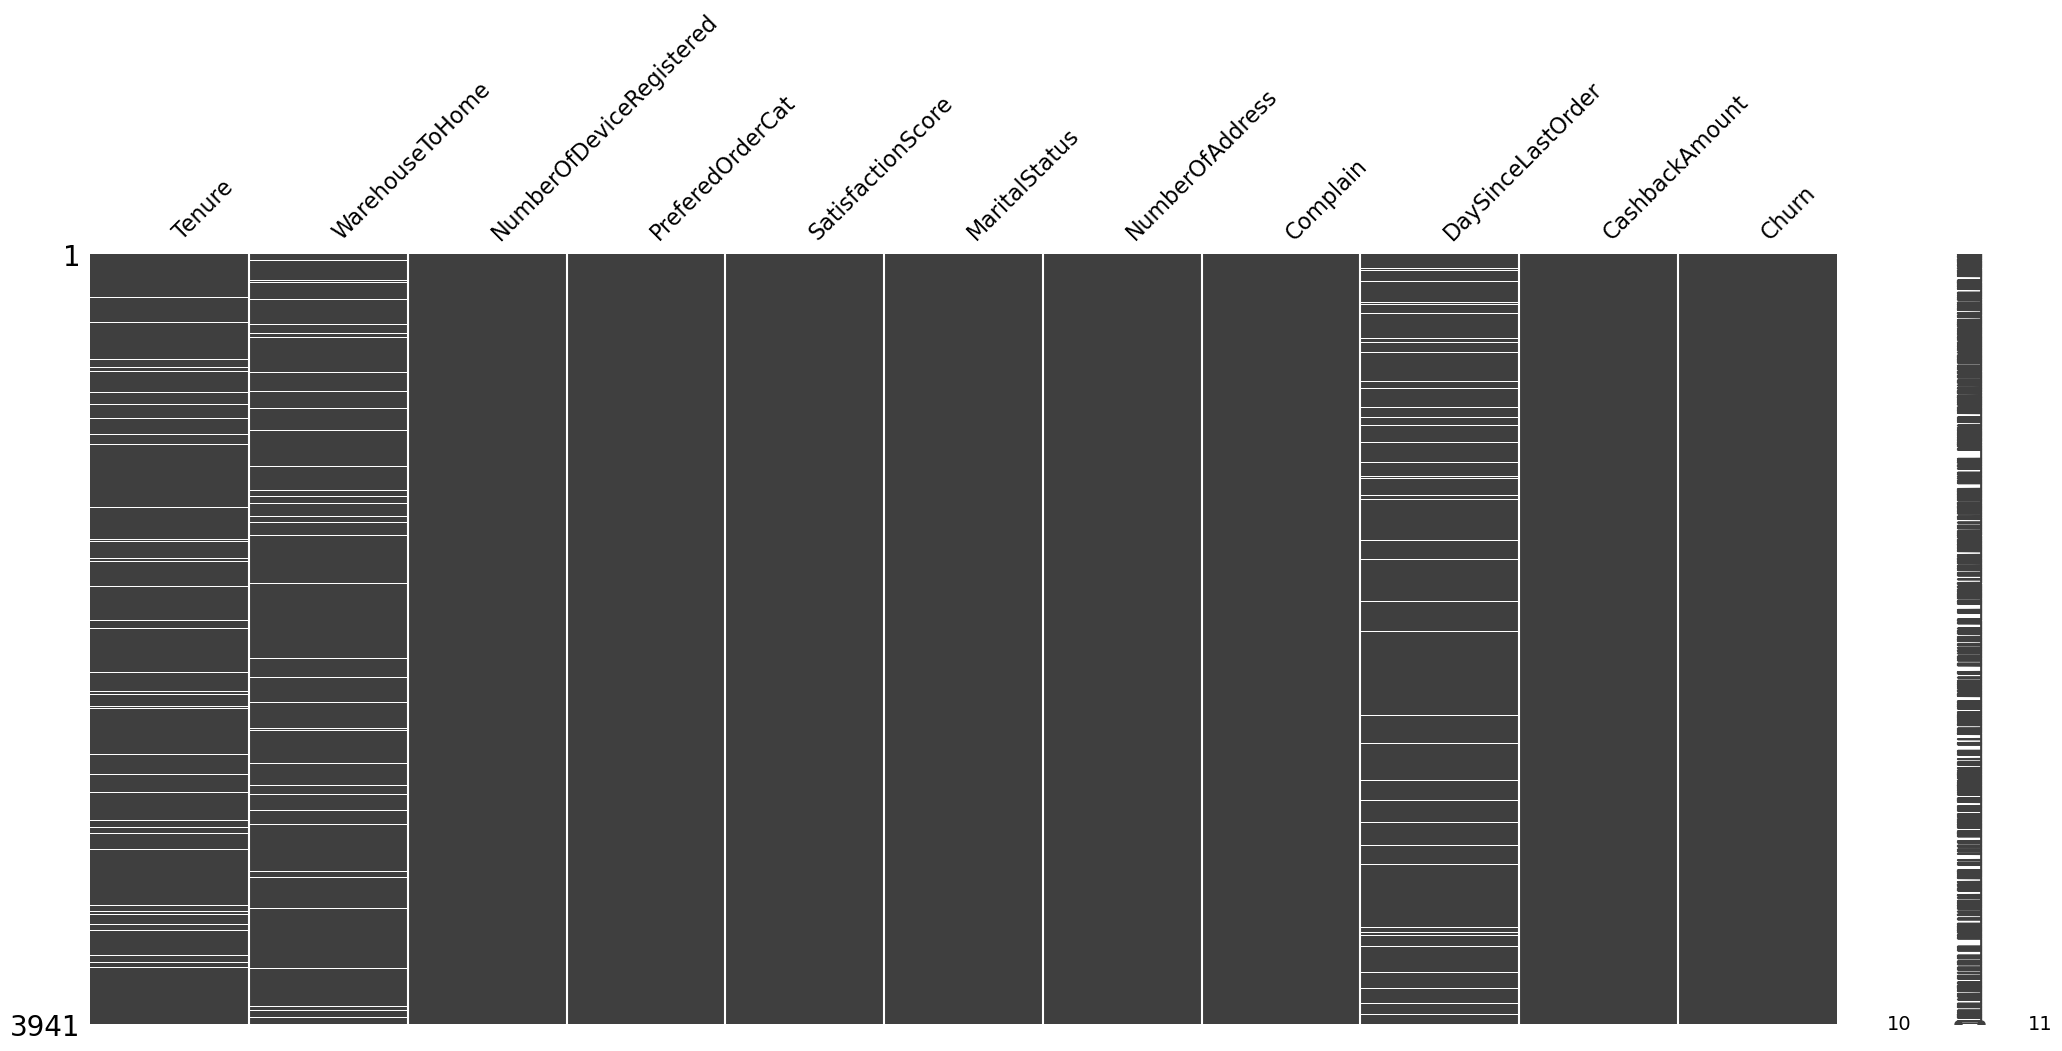

In [103]:
missingno.matrix(df)

Berdasarkan matrix correlation diatas, missing values termasuk kategori (Missing Completely at Random) atau missing data tidak ada hubungan antara missing data dengan nilai feature lainnya.

## Duplicate Data

In [104]:
total_data = len(df)
duplicate_total = df.duplicated().sum()
duplicate_data = df[df.duplicated()]
duplicate_percentage = duplicate_total / total_data * 100
print(f'Total number of duplicate rows: {duplicate_total} atau {duplicate_percentage}')
duplicate_data.head(5)

Total number of duplicate rows: 671 atau 17.026135498604415


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0


In [105]:
duplicate_data.tail(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## Inconsisten Data

In [106]:
# Menampilkan jumlah nilai unik dan nilai unik pada setiap kolom yang ada :
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableUnique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tableUnique

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Berdasarkan table of unique diatas, pada feature ***PreferedOrderCat***	terdapat inconsisten data yaitu pada value Mobile dan Mobile Phone.

## Numeric

In [107]:
numeric = df.select_dtypes(include='number')
numeric.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

### Statistic Descriptive

In [108]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


## Distribusi Data

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3636370583.py:7: UserWarning:

The figure layout has changed to tight



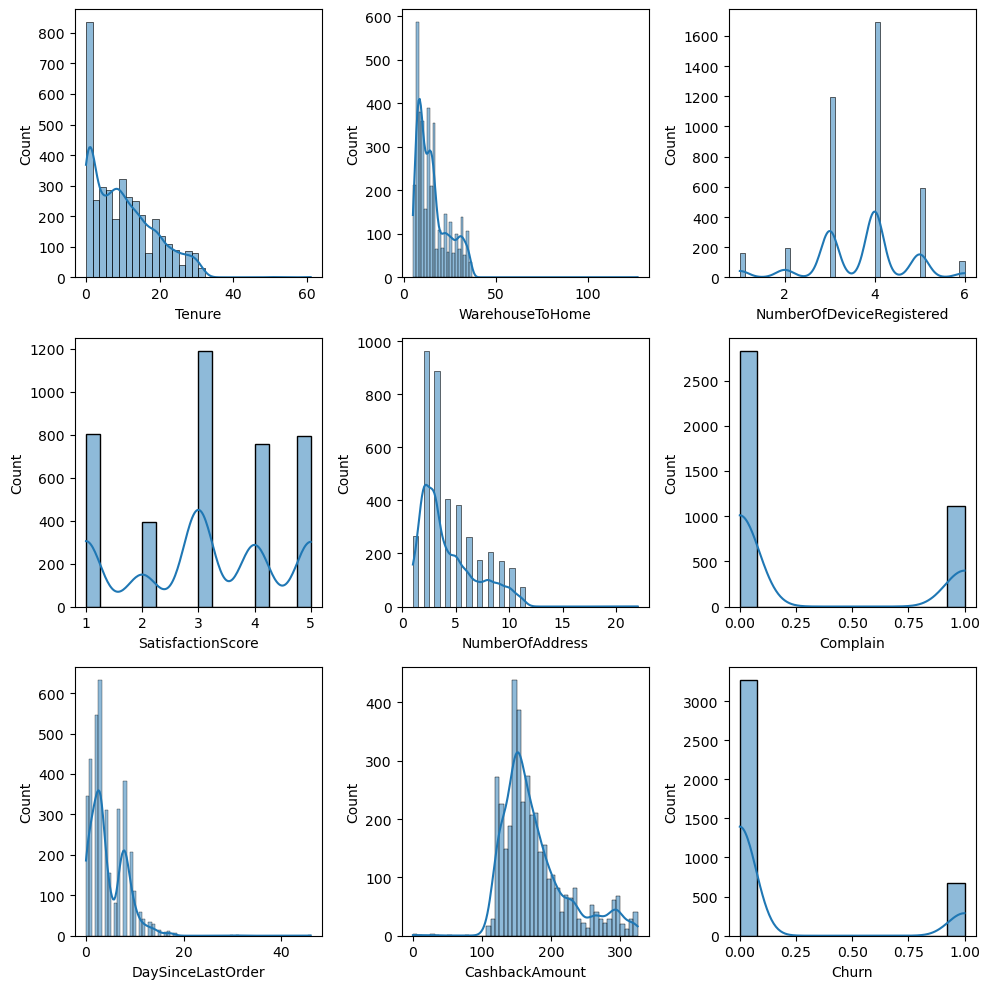

In [109]:
fig = plt.figure(figsize=(10,10)) # (horizontal, vertikal)
posisi = 1

for kolom in numeric.columns:
  plt.subplot(3,3,posisi) # (berapa baris, berapa kolom, di urutan ke berapa)
  sns.histplot(numeric[kolom], kde = True) # kernell density estimator
  fig.tight_layout()

  posisi += 1

plt.show()

Feature bernilai Diskrit :
- SatisfactionScore
- Complain
- Churn

Feature bernilai Continu :
- Tenure
- WarehouseToHome
- NumberOfDeviceRegistered
- NumberOfAddress
- DaySinceLastOrder
- CashbackAmount

Berdasarkan histogram diatas, semua feature numeric berdistribusi tidak normal. 

## Outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3224397928.py:8: UserWarning:

The figure layout has changed to tight



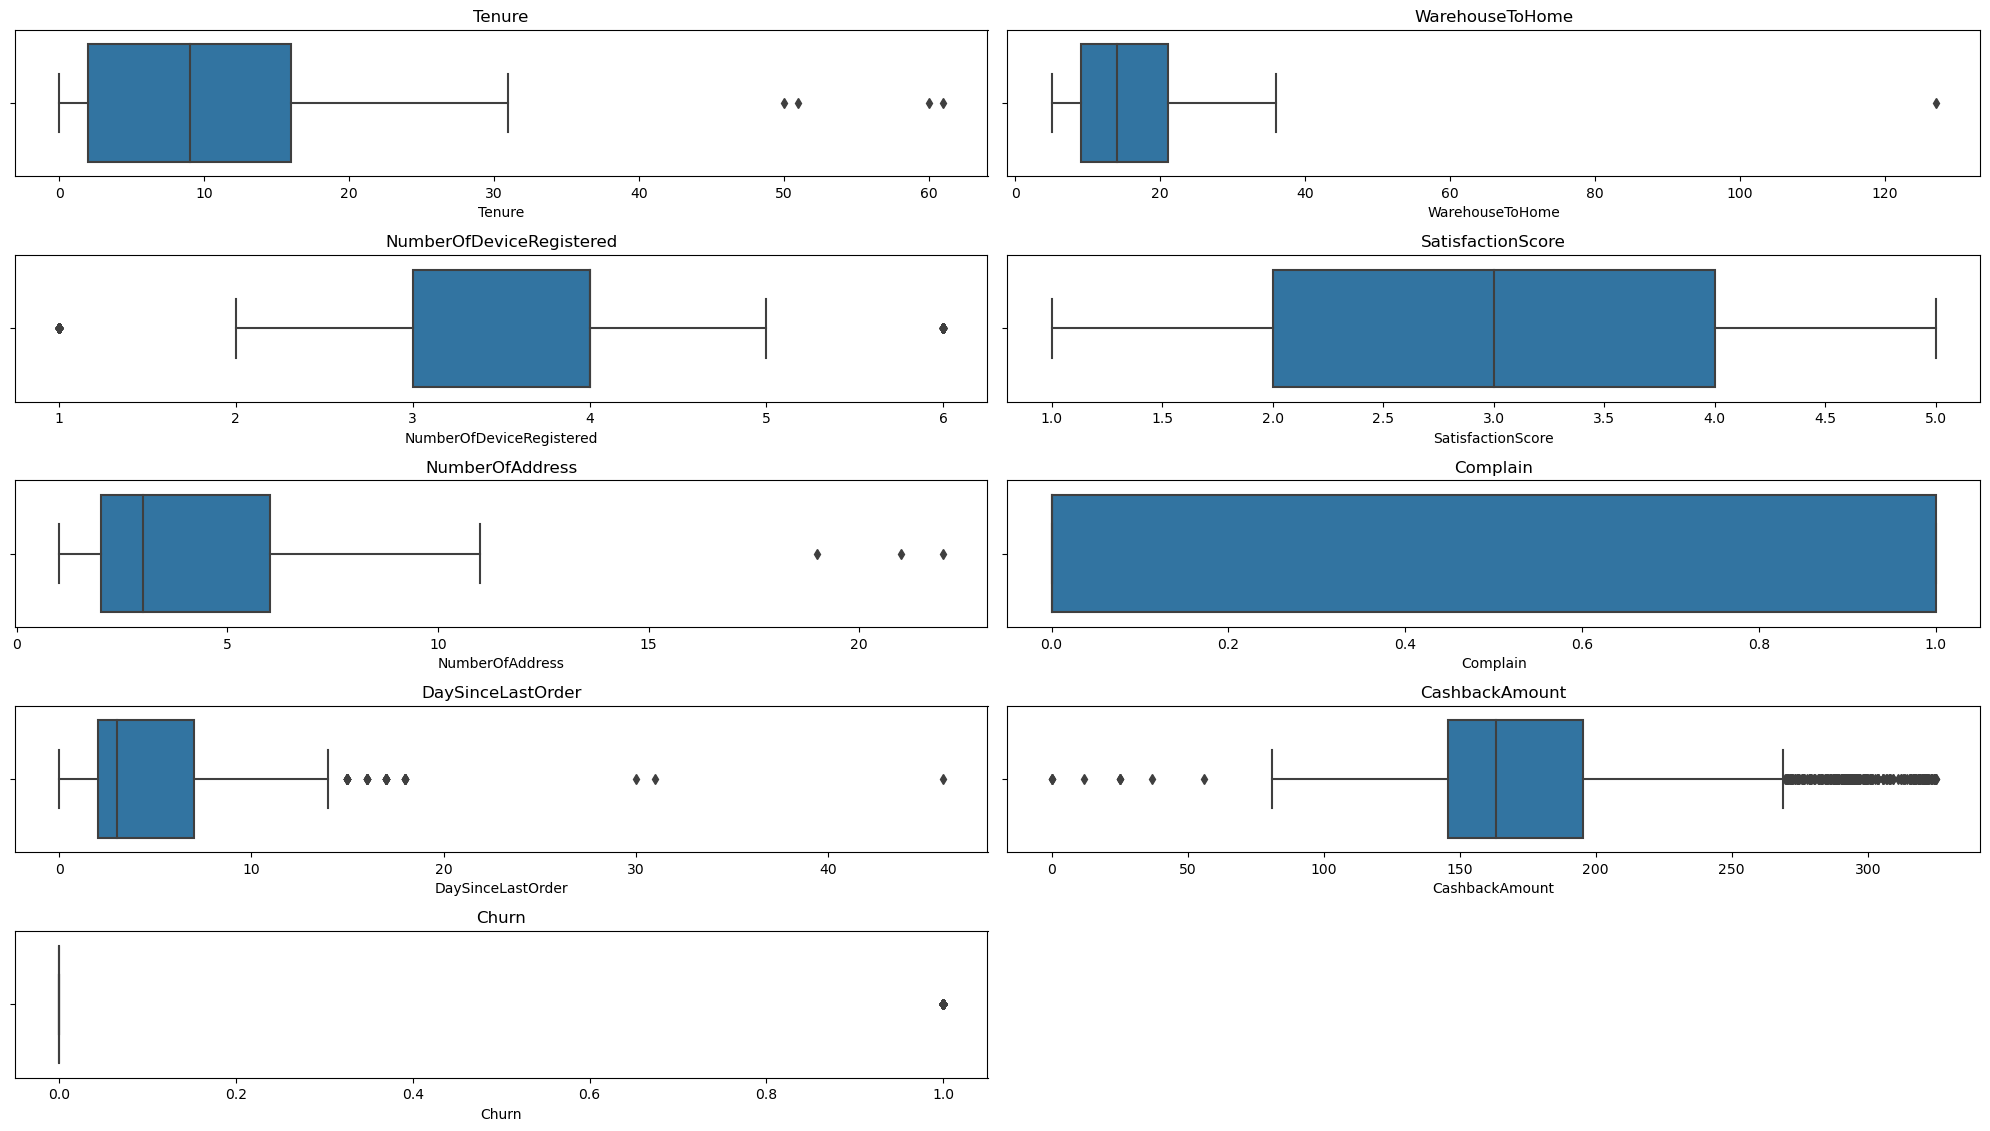

In [110]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numeric.columns:
    count += 1
    plt.subplot(9,2,count)
    sns.boxplot(numeric, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [111]:
def check_outliers(df, kolom):
  for kolom in numeric.columns:
      q1 = df[kolom].describe().loc['25%']
      q3 = df[kolom].describe().loc['75%']
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
      print(f"data {kolom} memiliki outliers {jumlah_outliers}")

check_outliers(df, numeric.columns)

data Tenure memiliki outliers 4
data WarehouseToHome memiliki outliers 1
data NumberOfDeviceRegistered memiliki outliers 271
data SatisfactionScore memiliki outliers 0
data NumberOfAddress memiliki outliers 3
data Complain memiliki outliers 0
data DaySinceLastOrder memiliki outliers 43
data CashbackAmount memiliki outliers 316
data Churn memiliki outliers 674


Dilihat beberapa feature yang memiliki outliers masih relevan dengan data lainnya.

## Correlation

In [112]:
numeric.corr(method='spearman')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.053618,-0.017633,-0.048987,0.277656,-0.041638,0.198661,0.431859,-0.420157
WarehouseToHome,-0.053618,1.000000,0.026200,0.023106,0.023512,0.039878,0.025546,0.023663,0.074552
NumberOfDeviceRegistered,-0.017633,0.026200,1.000000,0.000564,0.124153,0.013035,0.035833,0.203806,0.103913
SatisfactionScore,-0.048987,0.023106,0.000564,1.000000,0.041714,-0.033045,0.019757,-0.009212,0.106293
NumberOfAddress,0.277656,0.023512,0.124153,0.041714,1.000000,0.008248,-0.070876,0.259277,0.025071
Complain,-0.041638,0.039878,0.013035,-0.033045,0.008248,1.000000,-0.048045,0.018085,0.261450
DaySinceLastOrder,0.198661,0.025546,0.035833,0.019757,-0.070876,-0.048045,1.000000,0.375708,-0.188466
CashbackAmount,0.431859,0.023663,0.203806,-0.009212,0.259277,0.018085,0.375708,1.000000,-0.182730
Churn,-0.420157,0.074552,0.103913,0.106293,0.025071,0.261450,-0.188466,-0.182730,1.000000


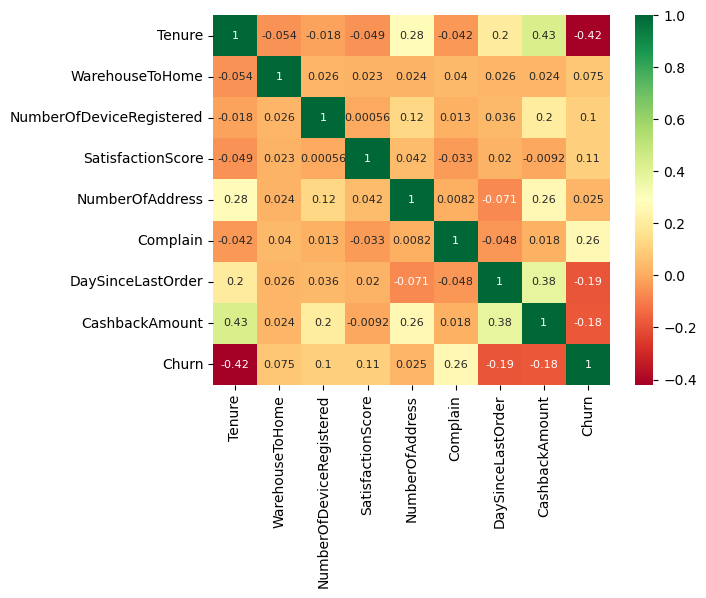

<Figure size 2000x2000 with 0 Axes>

In [113]:
# Membuat heatmap dengan subset variabel
heatmap = sns.heatmap(numeric.corr(method='spearman'), cmap="RdYlGn", annot=True, annot_kws={"fontsize": 8})

# Mengatur ukuran plot
plt.figure(figsize=(20, 20))

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

## Categoric

In [114]:
categoric = df.select_dtypes(exclude='number')
categoric

,PreferedOrderCat,MaritalStatus
0,Laptop & Accessory,Single
1,Mobile,Married
2,Laptop & Accessory,Married
3,Fashion,Divorced
4,Others,Single
...,...,...
3936,Fashion,Married
3937,Mobile Phone,Single
3938,Laptop & Accessory,Married
3939,Mobile,Married


In [115]:
df.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


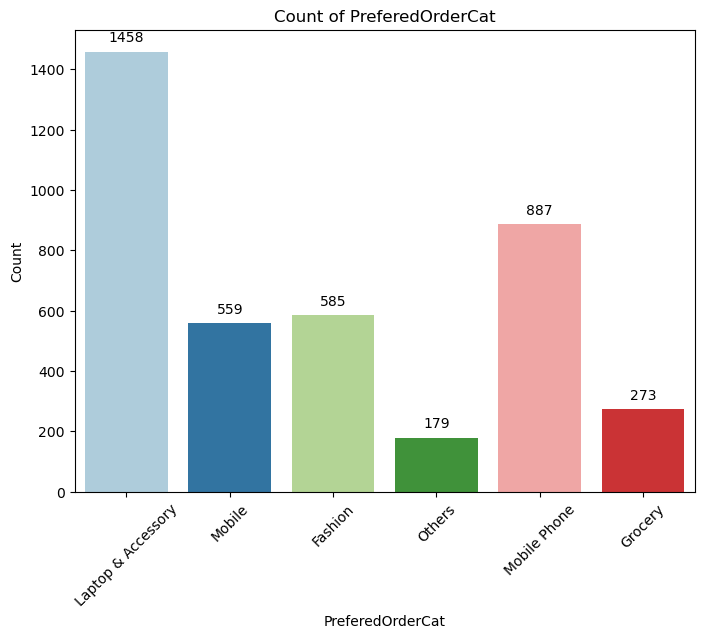

In [116]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='PreferedOrderCat', palette='Paired')
plt.title('Count of PreferedOrderCat')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()


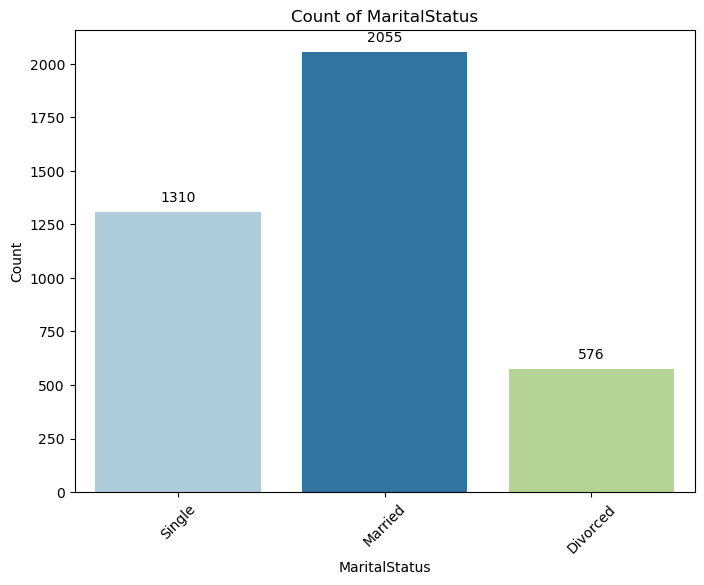

In [117]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='MaritalStatus', palette='Paired')
plt.title('Count of MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()


- Feature **PreferedOrderCat** terdapat **6** unique values dan value **Laptop & Accessory** memiliki freq tertinggi sebesar **1458**
- Feature **MaritalStatus** terdapat **3** unique values dan value **Married** memiliki freq tertinggi sebesar **2055**

# Data Cleaning

In [118]:
df_prep = df.copy()

In [119]:
len(df_prep)

3941

## Handling Missing Values

Handling missing values pada dataset ini menggunakan KNN imputer. Metode ini
memprediksi missing value berdasarkan variabel lainnya (tetangga terdekat) menggunakan metode KNN (Algoritma machine learning). Pada case ini KNN imputer digunakan karena metode ini dikatakan robust terhadap outlier jika metode tersebut tidak terlalu dipengaruhi oleh kehadiran outlier.

In [120]:
imputer = KNNImputer(n_neighbors=5) # 5 default
df_prep[['DaySinceLastOrder','Tenure','WarehouseToHome']] = imputer.fit_transform(df_prep[['DaySinceLastOrder','Tenure','WarehouseToHome']])

In [121]:
total_data = len(df_prep)
missing = df_prep.isna().sum().sort_values(ascending=False)
percentage = missing / total_data * 100
pd.DataFrame({'Total':missing, 'Percentage':percentage})

,Total,Percentage
Tenure,0,0.0
WarehouseToHome,0,0.0
NumberOfDeviceRegistered,0,0.0
PreferedOrderCat,0,0.0
SatisfactionScore,0,0.0
MaritalStatus,0,0.0
NumberOfAddress,0,0.0
Complain,0,0.0
DaySinceLastOrder,0,0.0
CashbackAmount,0,0.0


## Handling Duplicate Data

In [122]:
df_prep.duplicated().sum()

672

Diasumsikan data duplicate bersumber dari customerID yang berbeda namun memiliki karekteristik data yang sama, maka data duplicate tidak di drop agar data tidak kehilangan banyak informasi.

## Handling Inconsisten Data

Pada feature **PreferedOrderCat** terdapat nilai **Mobile Phone** dan **Mobile**. Terdapat ketidak konsistenan data. Maka nilai **Mobile Phone** akan di ubah menjadi **Mobile**.

In [123]:
df_prep['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          887 
Fashion               585 
Mobile                559 
Grocery               273 
Others                179 
Name: count, dtype: int64

In [124]:
df_prep['PreferedOrderCat'] = df_prep['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')

In [125]:
df_prep['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile                1446
Fashion               585 
Grocery               273 
Others                179 
Name: count, dtype: int64

In [126]:
df.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [127]:
df_prep.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,5,3
top,Laptop & Accessory,Married
freq,1458,2055


Setelah handling inconsisten data. Dicek kembali describe object untuk mengecek apakah ada perubahan signifikan pada feature categoric. Dan hasilnya tidak ada perubahan signifikan pada describe object.

## Handling Outliers

Dalam develop machine learning pada case ini, handling outliers dilakukan 2 kali, hal ini dilakukan untuk mengcompare model mana yang menghasilkan model dengan performa terbaik :
1. Handling Outliers akan menghapus outliers pada feature yang memiliki sedikit outlier. Outlier yang akan dihapus hanya pada feature Tenure, WarehouseToHome, NumberOfAddress.
2. Handling Outliers akan menghapus outliers pada semua feature yang memiliki outliers kecuali feature target.
Pada case ini akan membandingkan performa mana yang lebih baik berdasarkan outliernya.


In [128]:
def remove_outliers(df_prep, kolom):
    for kol in kolom:
        q1 = df_prep[kol].describe().loc['25%']
        q3 = df_prep[kol].describe().loc['75%']
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_prep = df_prep[(df_prep[kol] >= lower_bound) & (df_prep[kol] <= upper_bound)]
    return df_prep

In [129]:
low_outliers = ['Tenure','WarehouseToHome','NumberOfAddress']
df_prep = remove_outliers(df_prep, low_outliers)

In [130]:
full_outliers = ['Tenure','WarehouseToHome','NumberOfAddress', 'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'CashbackAmount']
df_prep_full_clean_outliers = remove_outliers(df_prep, full_outliers)

In [131]:
numeric_prep = df_prep.select_dtypes(include='number')
numeric_prep.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [132]:
for kolom in numeric_prep.columns:
      q1 = df_prep[kolom].describe().loc['25%']
      q3 = df_prep[kolom].describe().loc['75%']
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      jumlah_outliers = df_prep[(df_prep[kolom] < lower_bound) | (df_prep[kolom] > upper_bound)].shape[0]
      print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Tenure memiliki outliers 0
data WarehouseToHome memiliki outliers 0
data NumberOfDeviceRegistered memiliki outliers 270
data SatisfactionScore memiliki outliers 0
data NumberOfAddress memiliki outliers 0
data Complain memiliki outliers 0
data DaySinceLastOrder memiliki outliers 43
data CashbackAmount memiliki outliers 313
data Churn memiliki outliers 673


In [133]:
for kolom in numeric_prep.columns:
      q1 = df_prep_full_clean_outliers[kolom].describe().loc['25%']
      q3 = df_prep_full_clean_outliers[kolom].describe().loc['75%']
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      jumlah_outliers = df_prep_full_clean_outliers[(df_prep_full_clean_outliers[kolom] < lower_bound) | (df_prep_full_clean_outliers[kolom] > upper_bound)].shape[0]
      print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Tenure memiliki outliers 0
data WarehouseToHome memiliki outliers 0
data NumberOfDeviceRegistered memiliki outliers 0
data SatisfactionScore memiliki outliers 0
data NumberOfAddress memiliki outliers 0
data Complain memiliki outliers 0
data DaySinceLastOrder memiliki outliers 0
data CashbackAmount memiliki outliers 115
data Churn memiliki outliers 606


In [134]:
# Dataset dengan outliers tidak di hapus
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [135]:
# Dataset dengan menghapus sedikit outliers
# 'Tenure','WarehouseToHome','NumberOfAddress'
df_prep.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000,3933.000000
mean,9.933588,15.580371,3.680651,3.089753,4.226036,0.282227,4.454462,176.673056,0.171116
std,8.217304,8.101952,1.013502,1.381770,2.588714,0.450141,3.603967,48.760991,0.376658
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.660000,0.000000
50%,8.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,31.000000,36.000000,6.000000,5.000000,11.000000,1.000000,46.000000,324.990000,1.000000


In [136]:
from scipy.stats import normaltest

numerik_df_prep = df_prep.select_dtypes(include='number')
numerik_df_prep.columns

lisPvalue = []
lisNormalitas = []
listKolom = numerik_df_prep.columns
for i in listKolom :
    stat,pvalue=normaltest(df_prep[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,Tenure,2.522419e-66,Tidak terdistribusi normal
1,WarehouseToHome,2.049441e-91,Tidak terdistribusi normal
2,NumberOfDeviceRegistered,1.137597e-31,Tidak terdistribusi normal
3,SatisfactionScore,0.000000e+00,Tidak terdistribusi normal
4,NumberOfAddress,2.617358e-95,Tidak terdistribusi normal
5,Complain,0.000000e+00,Tidak terdistribusi normal
6,DaySinceLastOrder,1.524407e-269,Tidak terdistribusi normal
7,CashbackAmount,2.307802e-142,Tidak terdistribusi normal
8,Churn,9.050897e-235,Tidak terdistribusi normal


In [137]:
# Dataset dengan menghapus semua outliers
# 'Tenure','WarehouseToHome','NumberOfAddress', 'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'CashbackAmount', 'Churn'
df_prep_full_clean_outliers.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,9.166677,15.705953,3.734669,3.089441,4.214478,0.285672,4.148669,167.302537,0.181274
std,7.829703,8.060402,0.793384,1.379106,2.604674,0.451801,3.168569,34.716715,0.385303
min,0.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,81.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,144.950000,0.000000
50%,8.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,159.450000,0.000000
75%,14.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,186.205000,0.000000
max,31.000000,36.000000,5.000000,5.000000,11.000000,1.000000,14.000000,270.680000,1.000000


In [138]:
from scipy.stats import normaltest

numerik_df_prep = df_prep_full_clean_outliers.select_dtypes(include='number')
numerik_df_prep.columns

lisPvalue = []
lisNormalitas = []
listKolom = numerik_df_prep.columns
for i in listKolom :
    stat,pvalue=normaltest(df_prep_full_clean_outliers[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,Tenure,2.847961e-66,Tidak terdistribusi normal
1,WarehouseToHome,9.573853e-76,Tidak terdistribusi normal
2,NumberOfDeviceRegistered,1.718703e-15,Tidak terdistribusi normal
3,SatisfactionScore,0.000000e+00,Tidak terdistribusi normal
4,NumberOfAddress,4.171664e-84,Tidak terdistribusi normal
5,Complain,0.000000e+00,Tidak terdistribusi normal
6,DaySinceLastOrder,7.308240e-57,Tidak terdistribusi normal
7,CashbackAmount,9.884666e-76,Tidak terdistribusi normal
8,Churn,4.393212e-182,Tidak terdistribusi normal


- Dilakukan 2 kali handling outliers :
<br>- Pertama melakukan handling outliers pada feature yang memiliki sedikit outliers, pada case ini disebut **data yang memiliki outliers** (df_prep).
<br>- Kedua melakukan handling outliers pada semua feature yang memiliki outliers kecuali feature target, pada case ini disebut **data yang tidak memiliki outliers** (df_prep_full_clean_outliers) walaupun nyatanya setelah handling outliers feature CashbackAmount masih memiliki outliers. Karena telah dilakukan percobaan menghilangkan 100% outliers pada feature yang memiliki outliers, menghasilkan value pada feature target hanya value 0 saja, maka outliers CashbackAmount dipertahankan.
- Setelah handling outliers hanya pada feature yang memiliki sedikit outliers, df dengan df_prep tidak ada perubahan yang signifikan pada distribusi data.
- Setelah handling outliers pada semua feature yang memiliki outliers, df_prep dengan df_prep_full_clean_outliers terdapat perubahan yang signifikan pada distribusi data feature CashbackAmount.

# Data Clean (Export Data)

In [139]:
# For Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# path = '/content/drive/MyDrive/Dataset/'
# df_prep.to_csv(path+'customer_clean.csv', index=None)

In [140]:
# For Local Drive
df_prep.to_csv('customer_clean.csv', index=False) # data yang memiliki outliers (df_prep)
df_prep_full_clean_outliers.to_csv('customer_clean_outliers.csv', index=False) # data yang tidak memiliki outliers (df_prep_full_clean_outliers)

# Exploratory Data Analysis

In [141]:
df2 = df_prep

In [142]:
print({df2.shape})
total_data = len(df2)
churn_data = df2['Churn'].value_counts()
percentage = churn_data / total_data * 100
pd.DataFrame({'Count':churn_data, 'Percentage':percentage})

{(3933, 11)}


,Count,Percentage
Churn,,
0,3260,82.88838
1,673,17.11162


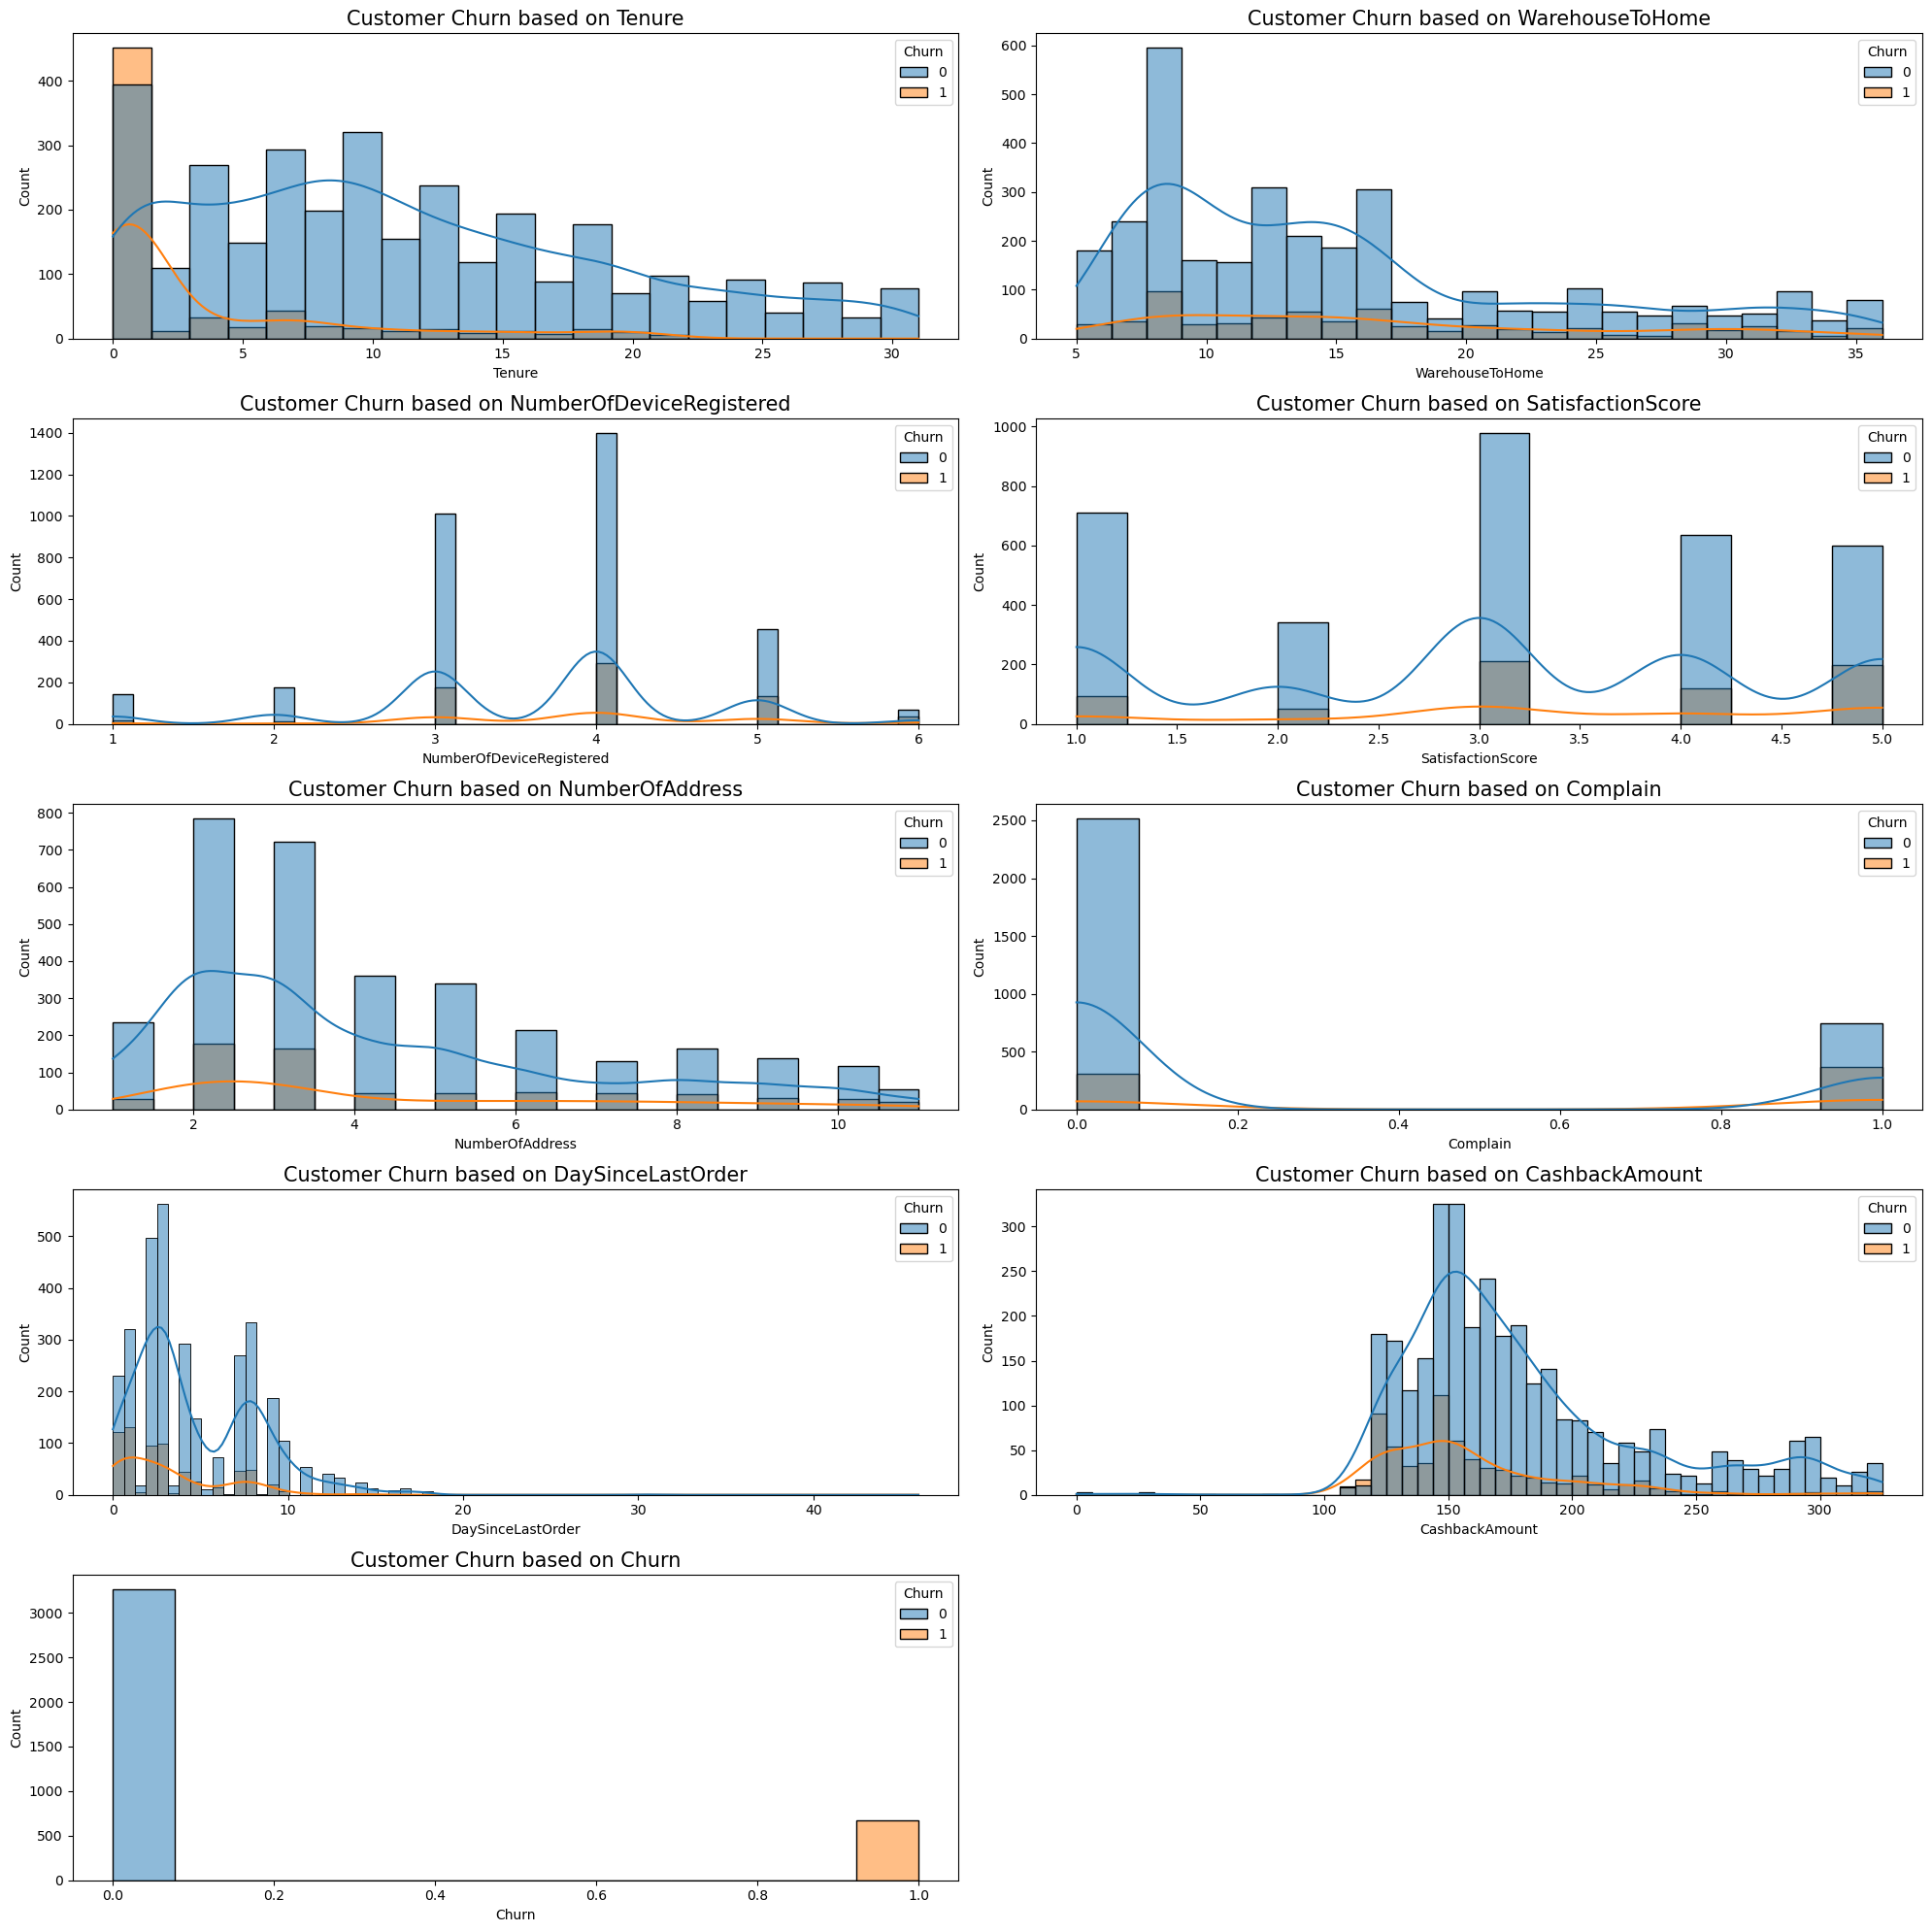

In [143]:
# Plotting
plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric.columns, 1):
    plt.subplot(5, 2, i)  # Adjusting to have a 2x3 grid for subplots
    sns.histplot(data=df2, x=col, hue='Churn', kde=True)
    plt.title(f'Customer Churn based on {col}', fontsize=15)

plt.tight_layout()
plt.show()

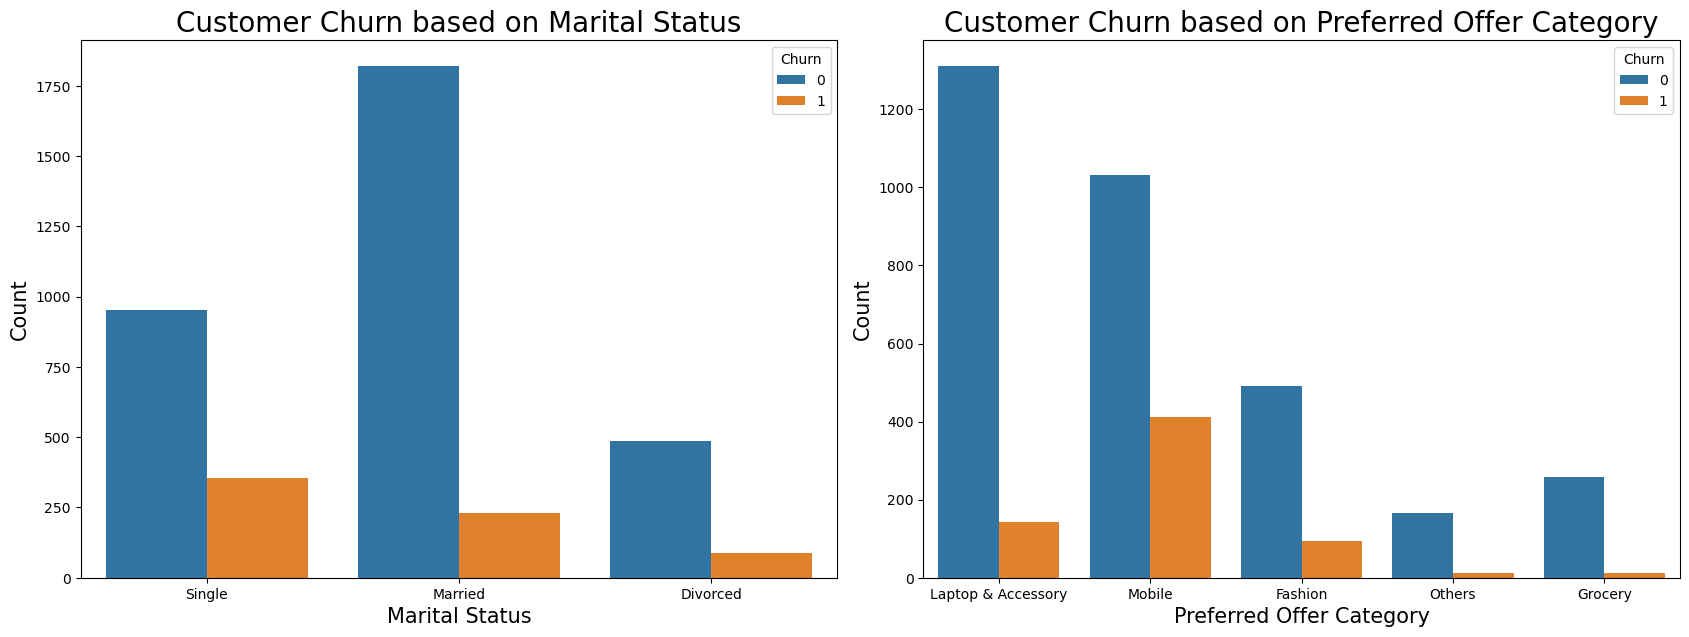

In [144]:
plt.figure(figsize=(17, 12))

# Plot for Marital Status
plt.subplot(221)
sns.countplot(data=df2, x='MaritalStatus', hue='Churn')
plt.title('Customer Churn based on Marital Status', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Plot for Preferred Offer Category
plt.subplot(222)
sns.countplot(data=df2, x='PreferedOrderCat', hue='Churn')
plt.title('Customer Churn based on Preferred Offer Category', fontsize=20)
plt.xlabel('Preferred Offer Category', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.tight_layout()
plt.show()

# Data Preprocessing & Feature Engineering

In [145]:
# For Google Collab
# df2 = pd.read_csv('/content/drive/MyDrive/Dataset/customer_clean.csv')
# df2.head(5)

# For Local Drive
# data yang memiliki outliers
df2 = pd.read_csv('customer_clean.csv')
df2.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [146]:
df2['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others', 'Grocery'],
      dtype=object)

In [147]:
# data yang tidak memiliki outliers
df3 = pd.read_csv('customer_clean_outliers.csv')
df3.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.0,230.27,0
4,7.0,16.0,4,Mobile,2,Divorced,2,0,11.0,152.81,0


In [148]:
df3['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Grocery'], dtype=object)

In [149]:
df2.shape

(3933, 11)

In [150]:
df3.shape

(3343, 11)

In [151]:
category = df2.select_dtypes(exclude='number')
category = category.columns
category

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

In [152]:
# Melihat value count variable categorical
for col in category:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count column {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Percentage :\n',percent)
    print('---'*10)
    print()

Value count column PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    1454
Mobile                1444
Fashion               585 
Grocery               271 
Others                179 
Name: count, dtype: int64

Percentage :
 PreferedOrderCat
Laptop & Accessory    36.97
Mobile                36.71
Fashion               14.87
Grocery               6.89 
Others                4.55 
Name: count, dtype: float64
------------------------------

Value count column MaritalStatus:
MaritalStatus
Married     2052
Single      1307
Divorced    574 
Name: count, dtype: int64

Percentage :
 MaritalStatus
Married     52.17
Single      33.23
Divorced    14.59
Name: count, dtype: float64
------------------------------



## Split Data

### Split Data pada data yang memiliki outliers

In [153]:
X = df2.drop(columns='Churn') # Feature
y = df2['Churn'] # Target

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3933 non-null   float64
 1   WarehouseToHome           3933 non-null   float64
 2   NumberOfDeviceRegistered  3933 non-null   int64  
 3   PreferedOrderCat          3933 non-null   object 
 4   SatisfactionScore         3933 non-null   int64  
 5   MaritalStatus             3933 non-null   object 
 6   NumberOfAddress           3933 non-null   int64  
 7   Complain                  3933 non-null   int64  
 8   DaySinceLastOrder         3933 non-null   float64
 9   CashbackAmount            3933 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 307.4+ KB


In [155]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3933 entries, 0 to 3932
Series name: Churn
Non-Null Count  Dtype
--------------  -----
3933 non-null   int64
dtypes: int64(1)
memory usage: 30.9 KB


In [156]:
# df2
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.5,
    random_state = 100)

In [157]:
X_train.select_dtypes(exclude='number').nunique()

PreferedOrderCat    5
MaritalStatus       3
dtype: int64

In [158]:
X_train.select_dtypes(include='number').head(2)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3391,15.0,18.0,3,1,4,1,0.0,150.87
2175,7.0,19.0,3,3,2,0,1.0,186.28


In [159]:
print('Result split data dengan data yang memiliki outliers : ')
print(f'X = {X.shape}')
print(f'y = {y.shape}')
print(f'X_train = {X_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

Result split data dengan data yang memiliki outliers : 
X = (3933, 10)
y = (3933,)
X_train = (1966, 10)
X_test = (1967, 10)
y_train = (1966,)
y_test = (1967,)


### Split Data pada data yang tidak memiliki outliers

In [160]:
X3 = df3.drop(columns='Churn') # Feature
y3 = df3['Churn'] # Target

In [161]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3343 non-null   float64
 1   WarehouseToHome           3343 non-null   float64
 2   NumberOfDeviceRegistered  3343 non-null   int64  
 3   PreferedOrderCat          3343 non-null   object 
 4   SatisfactionScore         3343 non-null   int64  
 5   MaritalStatus             3343 non-null   object 
 6   NumberOfAddress           3343 non-null   int64  
 7   Complain                  3343 non-null   int64  
 8   DaySinceLastOrder         3343 non-null   float64
 9   CashbackAmount            3343 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 261.3+ KB


In [162]:
y3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3343 entries, 0 to 3342
Series name: Churn
Non-Null Count  Dtype
--------------  -----
3343 non-null   int64
dtypes: int64(1)
memory usage: 26.2 KB


In [163]:
# df3
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X3,
    y3,
    stratify = y3,
    test_size = 0.5,
    random_state = 100)

In [164]:
print('Result split data dengan data yang tidak memiliki outliers : ')
print(f'X = {X3.shape}')
print(f'y = {y3.shape}')
print(f'X_train = {Xtrain.shape}')
print(f'X_test = {Xtest.shape}')
print(f'y_train = {ytrain.shape}')
print(f'y_test = {ytest.shape}')

Result split data dengan data yang tidak memiliki outliers : 
X = (3343, 10)
y = (3343,)
X_train = (1671, 10)
X_test = (1672, 10)
y_train = (1671,)
y_test = (1672,)


## Column Transformer

### Column Transform pada data yang memiliki outliers

- Feature **PreferedOrderCat** dan **MaritalStatus** ditransform menggunakan **One Hot Encoding**
- Feature **Tenure**, **WarehouseToHome**, **NumberOfDeviceRegistered**, **SatisfactionScore**, **NumberOfAddress**, **Complain**, **DaySinceLastOrder**, **CashbackAmount** di scalling menggunakan **Robust Scaler** karena data yang digunakan mengandung banyak outliers.

In [165]:
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
        ('scaler', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'])
    ], 
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

In [166]:
# df2
# transformer.fit(X_train)

In [167]:
# X_train_prep = pd.DataFrame(transformer.transform(X_train))
# X_test_prep = pd.DataFrame(transformer.transform(X_test))

In [168]:
# X_train_prep.shape

In [169]:
# X_train_prep.head(3)

In [170]:
# transformer.transformers_

In [171]:
# transformer.transformers_[0][1].get_feature_names_out()

In [172]:
# transformer.transformers_[1][2]

In [173]:
# features = list(transformer.transformers_[0][1].get_feature_names_out())+transformer.transformers_[1][2]
# features

In [174]:
# X_train_prep.columns = features
# X_test_prep.columns = features

In [175]:
# X_test_prep

In [176]:
# X_train_prep.info()

### Column Transform pada data yang tidak memiliki outliers

- Feature **PreferedOrderCat** dan **MaritalStatus** ditransform menggunakan **One Hot Encoding**
- Feature **Tenure**, **WarehouseToHome**, **NumberOfDeviceRegistered**, **SatisfactionScore**, **NumberOfAddress**, **Complain**, **DaySinceLastOrder**, **CashbackAmount** di scalling menggunakan **Min Max** karena data yang digunakan tidak mengandung banyak outliers.

In [177]:
transformer3 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
        ('scaler', MinMaxScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'])
    ], 
    remainder='passthrough'
)
transformer3

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('scaler', MinMaxScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

In [178]:
# df3
# transformer3.fit(Xtrain)

In [179]:
# Xtrain_prep = pd.DataFrame(transformer3.transform(Xtrain))
# Xtest_prep = pd.DataFrame(transformer3.transform(Xtest))

In [180]:
# Xtrain_prep.shape

In [181]:
# Xtrain_prep.head(3)

In [182]:
# transformer3.transformers_

In [183]:
# transformer3.transformers_[0][1].get_feature_names_out()

In [184]:
# transformer3.transformers_[1][2]

In [185]:
# features3 = list(transformer3.transformers_[0][1].get_feature_names_out())+transformer3.transformers_[1][2]
# features3

In [186]:
# Xtrain_prep.columns = features3
# Xtest_prep.columns = features3

In [187]:
# Xtest_prep

In [188]:
# Xtrain_prep.info()

## Imbalance

### Check Imbalance pada data yang memiliki outliers

In [189]:
y_train.shape

(1966,)

In [190]:
value_counts = pd.Series(y_train).value_counts()
percentage = value_counts / len(y_train) * 100
result_df = pd.concat([value_counts, percentage], axis=1)
result_df.columns = ['Value Counts', 'Percentage']
print(result_df)

       Value Counts  Percentage
Churn                          
0      1630          82.909461 
1      336           17.090539 


In [191]:
fig = px.histogram(y_train, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

Berdasarkan plot diatas feature CHurn (Target) pada data train ternyata imbalance, maka  feature CHurn (Target) akan di resampling menggunakan SMOTE.

SMOTE dipilih karena salah satu metode oversampling yang menyeimbangkan proporsi kelas minoritas dan kelas mayoritas dengan menghasilkan data sintetik dari kelas minoritas dan metode ini dapat membuat data-set menjadi seimbang tanpa terlalu overfit.

### Check Imbalance pada data yang tidak memiliki outliers

In [192]:
ytrain.shape

(1671,)

In [193]:
value_counts = pd.Series(ytrain).value_counts()
percentage = value_counts / len(ytrain) * 100
result_df3 = pd.concat([value_counts, percentage], axis=1)
result_df3.columns = ['Value Counts', 'Percentage']
print(result_df3)

       Value Counts  Percentage
Churn                          
0      1368          81.867145 
1      303           18.132855 


In [194]:
fig = px.histogram(ytrain, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [195]:
# Benchmark Resampling untuk data yang tidak memiliki outliers / data yang memiliki sedikit outliers
# Resampling methods
resampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=2000),
    'RandomOverSampler': RandomOverSampler(random_state=2000),
    'SMOTE': SMOTE(random_state=2000),
    'NearMiss': NearMiss(),
}

results = {}

for name, method in resampling_methods.items():
    pipeline = ImbPipeline([
        ('preprocessing', transformer3),
        ('Resampling', method),
        ('LogReg', LogisticRegression(max_iter=1000))  # Increased max_iter for convergence
    ])
    
    # Fitting
    pipeline.fit(Xtrain, ytrain)
    pred = pipeline.predict(Xtest)

    # Show F1 score
    # Adjust pos_label based on your data. Here assuming '1' is the positive label for claiming.
    f1 = f1_score(ytest, pred, average='binary', pos_label=1)  # Adjust pos_label accordingly
    results[name] = f1

for resampling_method, f1 in results.items():
    print(f'{resampling_method}: {f1:.4f}')

RandomUnderSampler: 0.5852
RandomOverSampler: 0.5741
SMOTE: 0.5757
NearMiss: 0.4584


Berdasarkan plot diatas feature CHurn (Target) pada data train ternyata imbalance, maka  feature CHurn (Target) akan di resampling.
Setelah dilakukan resampling benchmark, maka hasil metode resampling terbesar yaitu **RandomUnderSampler: 0.5641**, berbeda sedikit dengan **SMOTE: 0.5640**.
Maka metode resampling yang digunakan pada data yang tidak memiliki outliers / data yang memiliki sedikit outliers yaitu **RandomUnderSampler**.

# Benchmark Modeling

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Trees
- Random Forest
- LightGBM
- Support Vector Machines (SVM)

### Benchmark Modeling pada data yang memiliki outliers

In [196]:
logreg = LogisticRegression(random_state=0, penalty='l2', C=1.0)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=10, min_samples_leaf=5)
rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)
lgbm = LGBMClassifier(random_state=0, n_estimators=1000, learning_rate=0.01)
svc = SVC(random_state=0, kernel='linear', C=1.0)

# models = [logreg, knn, dt, rf, lgbm, svc]
# score = []
# score_list = []
# std = []

# logreg = LogisticRegression(random_state=0)
# knn = KNeighborsClassifier()
# dt = DecisionTreeClassifier(random_state=0)
# rf = RandomForestClassifier(random_state=0)
# lgbm = LGBMClassifier(random_state=0)
# svc = SVC(random_state=0)

models = [logreg,knn,dt,rf,lgbm,svc]
score=[]
score_list=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=1000)
    estimator = ImbPipeline([
        ('preprocess', transformer),
        ('smote', SMOTE(random_state=42)),
        ('model', i)
    ])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    score_list.append(model_cv.mean())
    std.append(model_cv.std())

[LightGBM] [Info] Number of positive: 1304, number of negative: 1304
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1979
[LightGBM] [Info] Number of data points in the train set: 2608, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1304, number of negative: 1304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1987
[LightGBM] [Info] Number of data points in the train set: 2608, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1304, number of negative: 

In [197]:
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'LightGBM','SVC'],
    'mean F1-Score':score_list,
    'stdev':std}).set_index('model').sort_values(by='mean F1-Score',ascending=False)

,mean F1-Score,stdev
model,,
LightGBM,0.711982,0.028688
Random Forest,0.697866,0.017376
Decision Tree,0.610074,0.020251
SVC,0.593335,0.030005
KNN,0.585613,0.031017
Logistic Regression,0.583900,0.017117


- Metric yang digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah klasifikasi kali ini adalah dengan F1 score.
- Di dapat 2 Model terbaik yaitu LGBM dengan F1 Score sebesar 0.767762 dan Random Forest dengan F1 Score sebesar 0.737554.  

### Benchmark Modeling pada data yang tidak memiliki outliers

In [198]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)
svc = SVC(random_state=0)

models = [logreg,knn,dt,rf,lgbm,svc]
score=[]
score_list3=[]
std3=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=1000)
    estimator = ImbPipeline([
        ('preprocess', transformer3),
        ('randomunder', RandomUnderSampler(random_state=42)),
        ('model', i)
    ])
    model_cv=cross_val_score(estimator,Xtrain,ytrain,cv=skfold,scoring='f1')
    score.append(model_cv)
    score_list3.append(model_cv.mean())
    std3.append(model_cv.std())

[LightGBM] [Info] Number of positive: 242, number of negative: 242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [199]:
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'LightGBM','SVC'],
    'mean F1-Score':score_list3,
    'stdev':std3}).set_index('model').sort_values(by='mean F1-Score',ascending=False)

,mean F1-Score,stdev
model,,
Random Forest,0.657213,0.015234
LightGBM,0.634517,0.034326
Logistic Regression,0.562439,0.029506
Decision Tree,0.557282,0.031924
SVC,0.550014,0.037046
KNN,0.516219,0.030404


- Metric yang digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah klasifikasi kali ini adalah dengan F1 score.
- Di dapat 2 Model terbaik yaitu Random Forest dengan F1 Score sebesar 0.703664 dan LGBM dengan F1 Score sebesar 0.698027. 

# Hyperparameter Tuning

## Hyperparameter Tuning pada data yang memiliki outliers

In [200]:
# Define the LightGBM pipeline with SMOTE
lgbm_pipeline = ImbPipeline(steps=[
    ('preprocessor', transformer),
    ('smote', SMOTE(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=2000))
])

# Define the parameter grid for LightGBM
param_grid = {
    'lgbm__n_estimators': [100, 200, 300],
    'lgbm__max_depth': [10, 20, 30, -1],  # -1 means no limit
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__num_leaves': [31, 50, 100],
    'lgbm__min_child_samples': [20, 50, 100],
    'lgbm__subsample': [0.6, 0.8, 1.0],
    'lgbm__colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(lgbm_pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated F1 score:", grid_search.best_score_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[LightGBM] [Info] Number of positive: 1630, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data points in the train set: 3260, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters: {'lgbm__colsample_bytree': 1.0, 'lgbm__learning_rate': 0.05, 'lgbm__max_depth': 30, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 300, 'lgbm__num_leaves': 100, 'lgbm__subsample': 0.6}
Best cross-validated F1 score: 0.7470556077166289


In [201]:
rdf_pipeline = ImbPipeline(steps=[
    ('preprocessor', transformer),
    ('smote', SMOTE(random_state=42)),
    ('rdf', RandomForestClassifier(random_state=2000))
])

# Define the parameter grid RandomForest
param_grid = {
    'rdf__n_estimators': [100, 200, 300],
    'rdf__max_depth': [None, 10, 20, 30],
    'rdf__min_samples_split': [2, 5, 10],
    'rdf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rdf_pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated F1 score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'rdf__max_depth': 20, 'rdf__min_samples_leaf': 2, 'rdf__min_samples_split': 2, 'rdf__n_estimators': 300}
Best cross-validated F1 score: 0.722231779080721


Setelah dilakukan hyperparameter tuning :

<br>**LGBM**
- Best parameters: {
                     <br>'lgbm__colsample_bytree': 0.6, 
                     <br>'lgbm__learning_rate': 0.1, 
                     <br>'lgbm__max_depth': 30, 
                     <br>'lgbm__min_child_samples': 20, 
                     <br>'lgbm__n_estimators': 200, 
                     <br>'lgbm__num_leaves': 100, 
                     <br>'lgbm__subsample': 0.6}
- Best cross-validated F1 score: 0.8135951122473907

<br>**Random Forest**
- Best parameters: {
                    <br>'rdf__max_depth': None, 
                    <br>'rdf__min_samples_leaf': 1, 
                    <br>'rdf__min_samples_split': 2, 
                    <br>'rdf__n_estimators': 200}
- Best cross-validated F1 score: 0.7795420558436311

## Hyperparameter Tuning pada data yang tidak memiliki outliers

In [202]:
rdf_pipeline3 = ImbPipeline(steps=[
    ('preprocessor', transformer3),
    ('randomunder', RandomUnderSampler(random_state=42)),
    ('rdf', RandomForestClassifier(random_state=2000))
])

# Define the parameter grid RandomForest
param_grid = {
    'rdf__n_estimators': [100, 200, 300],
    'rdf__max_depth': [None, 10, 20, 30],
    'rdf__min_samples_split': [2, 5, 10],
    'rdf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search3 = GridSearchCV(rdf_pipeline3, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search3.fit(Xtrain, ytrain)

# Print best parameters and best score
print("Best parameters:", grid_search3.best_params_)
print("Best cross-validated F1 score:", grid_search3.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'rdf__max_depth': None, 'rdf__min_samples_leaf': 1, 'rdf__min_samples_split': 2, 'rdf__n_estimators': 100}
Best cross-validated F1 score: 0.63947940722714


In [203]:
# Define the LightGBM pipeline with SMOTE
lgbm_pipeline3 = ImbPipeline(steps=[
    ('preprocessor', transformer3),
    ('randomunder', RandomUnderSampler(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=2000))
])

# Define the parameter grid for LightGBM
param_grid = {
    'lgbm__n_estimators': [100, 200, 300],
    'lgbm__max_depth': [10, 20, 30, -1],  # -1 means no limit
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__num_leaves': [31, 50, 100],
    'lgbm__min_child_samples': [20, 50, 100],
    'lgbm__subsample': [0.6, 0.8, 1.0],
    'lgbm__colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search3 = GridSearchCV(lgbm_pipeline3, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search3.fit(Xtrain, ytrain)

# Print best parameters and best score
print("Best parameters:", grid_search3.best_params_)
print("Best cross-validated F1 score:", grid_search3.best_score_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 303, number of negative: 303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

Setelah dilakukan hyperparameter tuning :

<br>**Random Forest**
- Best parameters: {
                    <br>'rdf__max_depth': None, 
                    <br>'rdf__min_samples_leaf': 1, 
                    <br>'rdf__min_samples_split': 2, 
                    <br>'rdf__n_estimators': 200}
- Best cross-validated F1 score: 0.7225776335101705

<br>**LGBM**
- Best parameters: {
                    <br>'lgbm__colsample_bytree': 1.0, 
                    <br>'lgbm__learning_rate': 0.05, 
                    <br>'lgbm__max_depth': 10, 
                    <br>'lgbm__min_child_samples': 20, 
                    <br>'lgbm__n_estimators': 300, 
                    <br>'lgbm__num_leaves': 50, 
                    <br>'lgbm__subsample': 0.6}
- Best cross-validated F1 score: 0.7124192462163977

Setelah dilakukan hyperparameter tuning pada data yang memiliki outliers dan data yang tidak memiliki outliers. Didapat performa yang baik pada data yang memiliki outliers dengan model yang cukup baik performanya yaitu LGBM dengan **Best parameters: {'lgbm__colsample_bytree': 0.6, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 30, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 100, 'lgbm__subsample': 0.6}
Best cross-validated F1 score: 0.8135951122473907**

Maka pada case ini model yang dipilih yaitu LGBM

# Predict To Test Set (Final Model)

[LightGBM] [Info] Number of positive: 336, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 1966, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170905 -> initscore=-1.579224
[LightGBM] [Info] Start training from score -1.579224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

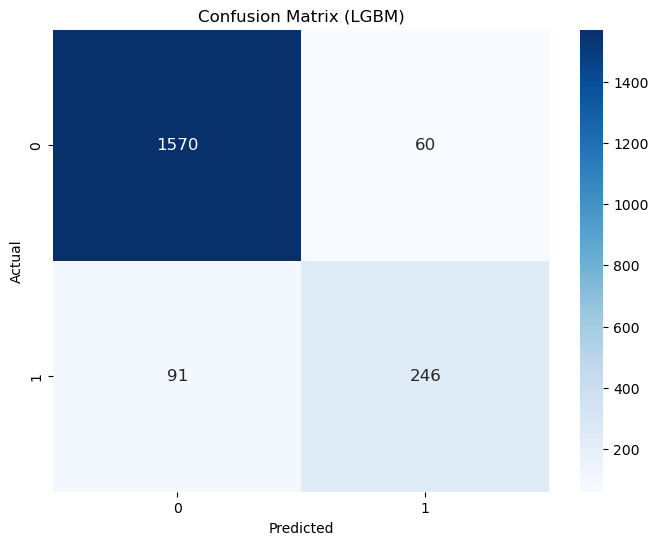

In [204]:
transformer.fit(X_train)

X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)


final_model_lgbm = LGBMClassifier(max_depth=30, min_child_samples=20, num_leaves=100, n_estimators=200)
final_model_lgbm.fit(X_train_transformed, y_train)
y_pred_lgbm = final_model_lgbm.predict(X_test_transformed)

f1_lgbm = f1_score(y_test, y_pred_lgbm, average='binary', pos_label=1)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

print(f"Final Model Test F1 Score (LGBM): {f1_lgbm:.4f}")
print(f"Final Model Test Accuracy (LGBM): {accuracy_lgbm:.4f}")
print("Classification Report (LGBM):\n", classification_report(y_test, y_pred_lgbm))

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LGBM)')
plt.show()


# Comparison Data Train and Data Test

In [205]:
# Evaluasi pada data training
y_train_pred = final_model_lgbm.predict(transformer.transform(X_train))
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label=1)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluasi pada data test
y_test_pred = final_model_lgbm.predict(transformer.transform(X_test))
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='binary', pos_label=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Membandingkan hasil
print("\nComparison:")
print(f"Accuracy: Train = {train_accuracy:.4f}, Test = {test_accuracy:.4f}")
print(f"F1 Score: Train = {train_f1:.4f}, Test = {test_f1:.4f}")

Training Accuracy: 1.0000
Training F1 Score: 1.0000
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00       336

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966

Test Accuracy: 0.9232
Test F1 Score: 0.7652
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1630
           1       0.80      0.73      0.77       337

    accuracy                           0.92      1967
   macro avg       0.87      0.85      0.86      1967
weighted avg       0.92      0.92      0.92      1967


Comparison:
Accuracy: Train = 1.0000, Test = 0.9232
F1 Score: Train = 1.0000, Test = 0.7652


[LightGBM] [Info] Number of positive: 16, number of negative: 141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 157, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101911 -> initscore=-2.176171
[LightGBM] [Info] Start training from score -2.176171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


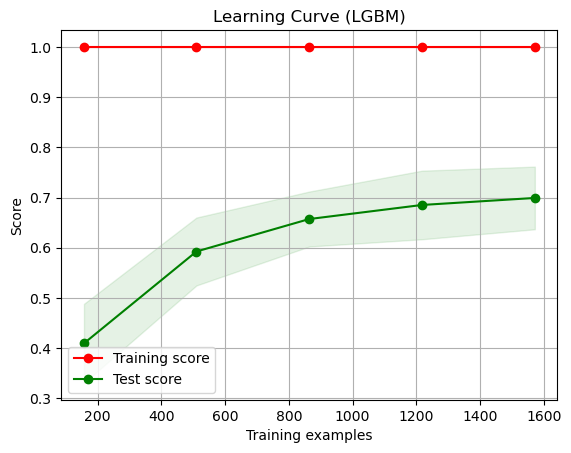

In [206]:
# Mendapatkan learning curve
train_sizes, train_scores, test_scores = learning_curve(
    final_model_lgbm, transformer.transform(X_train), y_train, cv=5, scoring='f1')

# Menghitung mean dan standar deviasi dari train dan test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve (LGBM)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

plt.legend(loc="best")
plt.show()


# Feature Importance

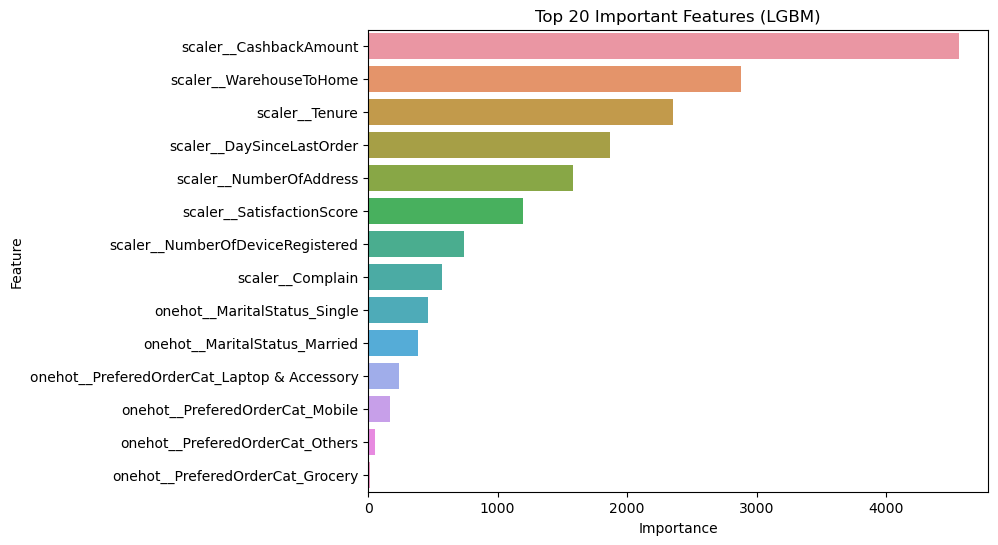

In [207]:
# Get feature importances
feature_importances = final_model_lgbm.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': transformer.get_feature_names_out(),  # Assuming transformer has a method get_feature_names_out()
    'Importance': feature_importances
})

# Sort the DataFrame based on importance values
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))  # Plot top 20 features
plt.title('Top 20 Important Features (LGBM)')
plt.show()


Terlihat bahwa pada kasus klasifikasi ini mengggunakan model LGBM, feature **CashbackAmount** adalah feature yang paling penting. Diikuti oleh feature **WarehouseToHome** , **Tenure** , **DaySinceLastOrder** dst.

[LightGBM] [Info] Number of positive: 336, number of negative: 1630
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 1966, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170905 -> initscore=-1.579224
[LightGBM] [Info] Start training from score -1.579224


 97%|=================== | 1903/1966 [00:14<00:00]       C:\Users\HP\AppData\Local\Temp\ipykernel_1824\3511503160.py:21: UserWarning:

The figure layout has changed to tight



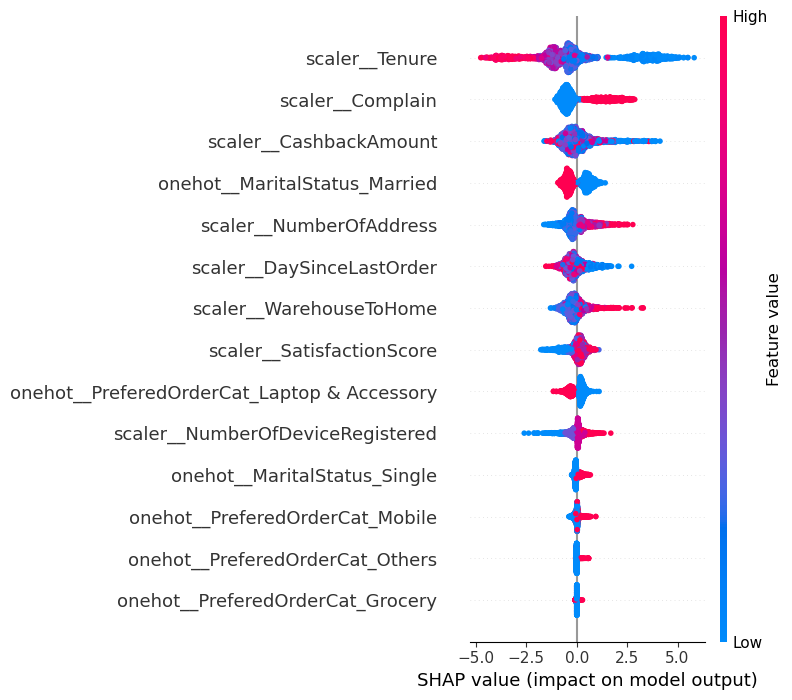

In [208]:
# Fit the transformer on the training data and transform both training and testing data
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Train the LGBMClassifier
model = LGBMClassifier()
model.fit(X_train_transformed, y_train)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(model, X_train_transformed)
shap_values = explainer(X_train_transformed)

# Create the summary plot
# Get the feature names after transformation
feature_names = transformer.get_feature_names_out()

# Create DataFrame for transformed features to match the shape and feature names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

shap.summary_plot(shap_values, X_train_transformed_df, plot_type="dot", show=False)
plt.tight_layout()
plt.show()

- Tenure : Fitur ini memiliki dampak signifikan terhadap output model. Nilai tenure yang lebih tinggi cenderung meningkatkan nilai SHAP, menunjukkan bahwa tenure yang lebih lama berhubungan dengan kemungkinan lebih rendah untuk churn.
- Complain : fitur complain sangat berpengaruh. Nilai keluhan yang tinggi sangat berhubungan dengan peningkatan risiko churn.
- Number of Address : Jumlah alamat yang lebih banyak berhubungan dengan peningkatan risiko churn, seperti yang ditunjukkan oleh nilai SHAP positif untuk jumlah alamat yang lebih tinggi.
- Cashback Amount : Fitur ini juga memiliki dampak yang signifikan. Jumlah cashback yang lebih tinggi cenderung mengurangi risiko churn,  seperti yang ditunjukkan oleh nilai SHAP negatif untuk Cashback Amount yang lebih tinggi.
- Preferred Order Category (Laptop & Accessory) : Customer yang lebih suka kategori ini cenderung lebih kecil kemungkinan untuk churn, seperti yang ditunjukkan oleh nilai SHAP negatif untuk fitur ini.
- Day Since Last Order : Waktu yang lebih lama sejak pesanan terakhir berhubungan dengan peningkatan risiko churn.
- Warehouse To Home : Jarak yang lebih jauh berhubungan dengan kemungkinan churn yang lebih tinggi.
- Satisfaction Score : Skor kepuasan yang lebih tinggi mengurangi risiko churn, seperti yang diharapkan.
- Marital Status (Single) : Customer yang belum menikah memiliki risiko churn yang lebih tinggi dibandingkan dengan yang lain.
- Number of Device Registered : Fitur ini memiliki dampak yang lebih kecil namun tetap terlihat terhadap risiko churn.
- Marital Status (Married): Customer yang sudah menikah menunjukkan beberapa korelasi dengan churn, meskipun tidak sebesar fitur lainnya.
- Preferred Order Categories (Mobile, Grocery, Others): Kategori ini menunjukkan tingkat pengaruh yang bervariasi tetapi kurang berpengaruh dibandingkan fitur utama.

# Conclusion & Recommendation

## Conclusion

In [209]:
print("Classification Report (LGBM):\n", classification_report(y_test, y_pred_lgbm))

Classification Report (LGBM):
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1630
           1       0.80      0.73      0.77       337

    accuracy                           0.92      1967
   macro avg       0.87      0.85      0.86      1967
weighted avg       0.92      0.92      0.92      1967



**Conclusion Model**
1. Telah dilakukan beberapa kali percobaan hasilnya selalu mengarah ke overfitting, maka dalam case ini data perlu diperbanyak agar mengurangi indikasi overfitting dan perlunya penambahan feature agar model tidak terlalu spesifik.
2. Lima (5) faktor yang mempengaruhi customer churn : 
    - Tenure : Fitur ini memiliki dampak signifikan terhadap output model. Nilai tenure yang lebih tinggi cenderung meningkatkan nilai SHAP, menunjukkan bahwa tenure yang lebih lama berhubungan dengan kemungkinan lebih rendah untuk churn.
    - Complain : fitur complain sangat berpengaruh. Nilai keluhan yang tinggi sangat berhubungan dengan peningkatan risiko churn.
    - Number of Address : Jumlah alamat yang lebih banyak berhubungan dengan peningkatan risiko churn, seperti yang ditunjukkan oleh nilai SHAP positif untuk jumlah alamat yang lebih tinggi.
    - Cashback Amount : Fitur ini juga memiliki dampak yang signifikan. Jumlah cashback yang lebih tinggi cenderung mengurangi risiko churn,  seperti yang ditunjukkan oleh nilai SHAP negatif untuk Cashback Amount yang lebih tinggi.
    - Preferred Order Category (Laptop & Accessory) : Customer yang lebih suka kategori ini cenderung lebih kecil kemungkinan untuk churn, seperti yang ditunjukkan oleh nilai SHAP negatif untuk fitur ini.

**Conclusion Bisnis**

1. Model dapat melakukan prediksi terhadap customer yang terindikasi churn
   - Best model LGBM 
     |F1 Score Train|F1 Score Test|
     |--------------|------------|
     |1.00       |0.87        |
    
    - Model dapat memprediksi 98% customer yang tidak churn dan 83% customer yang churn (berdasarkan Recall). 

### Estimasi Keuntungan Bisnis

Berdasarkan hasil classification report dari model LGBM, model yang dibangun dapat memprediksi 98% customer yang no churn, dan model dapat memprediksi 83% customer yang churn untuk menjadi target perusahaan menawarkan promosi (Hasil berdasarkan recall). Model ini memiliki ketepatan prediksi customer yang churn sebesar 92% (precision). 

Biaya Promosi dengan Menggunakan Model
1.	Menghitung Jumlah Customer yang Diprediksi Churn oleh Model:
    - Dari classification report, precision untuk kelas 1 (churn) adalah 0.92.
    - Recall untuk kelas 1 (churn) adalah 0.83.
    - Jumlah customer sebenarnya yang churn (support untuk kelas 1) adalah 135.

Untuk menghitung jumlah customer yang diprediksi churn oleh model, kita menggunakan precision:
<br>Diketahui True Positives (TP) adalah 135. 
<br>Jumlah customer yang diprediksi churn = TP/Precsion
<br>Jumlah customer yang diprediksi churn = 135 / 0.92 
                                      = 147
<br>Jadi, model memprediksi sekitar 147 customer sebagai churn.

2.	Menghitung Biaya Promosi Berdasarkan Prediksi Model:
    - Biaya promosi / customer = 20 USD
    - Jumlah customer yang diprediksi churn = 147
    - Total biaya promosi = 147×20 USD = 2940 USD
    
Biaya Promosi Tanpa Menggunakan Model
<br>Jika kita tidak menggunakan model dan melakukan promosi kepada semua customer dalam dataset:
1.	Menghitung Total Biaya Promosi Tanpa Model:
    - Jumlah total customer = 787
    - Biaya per promosi = 20 USD
    - Total biaya promosi = 787×20 USD=15740 USD
    
Ringkasan Perbandingan Biaya Promosi
    <br>- Dengan Model:
      <br>Total biaya promosi = 2940 USD
      <br>Promosi hanya diberikan kepada 147 customer yang diprediksi churn.
    <br>- Tanpa Model:
      <br>Total biaya promosi = 15740 USD
      <br>Promosi diberikan kepada semua 787 customer tanpa mempertimbangkan kemungkinan churn.

Dengan menggunakan model, perusahaan dapat menghemat biaya promosi secara signifikan. Dalam kasus ini, penghematan yang diperoleh dengan menggunakan model adalah:
<br>Penghematan = 15740 USD − 2940 USD = 12800 USD
<br>Ini menunjukkan bahwa penggunaan model LGBM efektif dalam memprediksi churn dan juga efisien dalam mengurangi biaya promosi yang dikeluarkan perusahaan.


## Recommendation

**Recommendation Bisnis**
- Perusahaan membuat program loyalitas terhadap customer dengan tenure yang lama agar customer merasa dihargai oleh e-commerce.
- Meningkatkan proses penanganan complain dengan menyediakan fitur komunikasi yang mudah diakses atau perusahaan perlu mengevaluasi layanan terhadap penanganan complain agar jumlah complain berkurang dan mengurangi risiko churn.
- Pemberian promo dalam bentuk cashback agar customer sering menggunakan e-commerce.
- Penyesuaian strategi promosi dengan memahami layanan produk yang memiliki retensi yang tinggi.

**Recommendation Model**
- Menambahkan CustomerID untuk memastikan data dan sebagai pendukung langkah handling data duplicate.
- Penambahan kolom seperti PreferredPaymentMode, HourSpendOnApp atau OrderCount agar prediksi lebih menunjang terhadap keputusan.

# Save Model

In [210]:
# Save the model and transformer
with open('final_model_lgbm.pkl', 'wb') as file:
    pickle.dump(final_model_lgbm, file)

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

# Load Model

In [211]:
# Load Model
with open('final_model_lgbm.pkl', 'rb') as file_model:
    lgbm_load = pickle.load(file_model)

with open('transformer.pkl', 'rb') as file_transformer:
    transformer_load = pickle.load(file_transformer)

In [212]:
lgbm_load

LGBMClassifier(max_depth=30, n_estimators=200, num_leaves=100)

In [213]:
transformer_load

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

In [214]:
df2[df2['Churn']==1]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
7,1.0,11.0,4,Mobile,5,Single,3,0,1.0,154.73,1
12,1.0,7.0,4,Mobile,3,Divorced,5,0,3.0,154.09,1
13,1.0,7.0,5,Fashion,3,Divorced,7,0,2.2,231.09,1
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78,1
19,0.0,18.0,1,Mobile,4,Single,2,0,0.0,127.16,1
...,...,...,...,...,...,...,...,...,...,...,...
3897,15.0,11.0,3,Fashion,4,Single,10,1,7.0,184.46,1
3899,2.0,21.8,3,Mobile,5,Divorced,8,1,2.0,124.04,1
3908,0.0,24.0,3,Mobile,1,Single,2,0,0.0,126.93,1
3917,16.4,8.0,4,Mobile,3,Single,2,0,2.0,120.44,1


In [215]:
input_baru = pd.DataFrame({
    'Tenure': [2],
    'WarehouseToHome': [30],
    'NumberOfDeviceRegistered': [5],
    'PreferedOrderCat': ["Mobile"],
    'SatisfactionScore': [1],
    'MaritalStatus': ["Single"],
    'NumberOfAddress': [10],
    'Complain': [1],
    'DaySinceLastOrder': [9],
    'CashbackAmount': [100.00]
})

input_baru_transformed = transformer_load.transform(input_baru)
pred = lgbm_load.predict(input_baru_transformed)

if pred == 1:
    print('Customers churn')
else:
    print('Customers no churn')

Customers churn
